In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
movie_df = pd.read_csv('../../DB_work/csv/movies_train.csv')
movie_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [18]:
#1) 천만 관중을 달성한 영화를 그래프로 확인 하자.
# 영화제목과 관중 수를 출력해보자.
tenmillion_df = movie_df[movie_df['box_off_num'] >= 10000000][['title', 'box_off_num']]
tenmillion_df 

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


<BarContainer object of 6 artists>

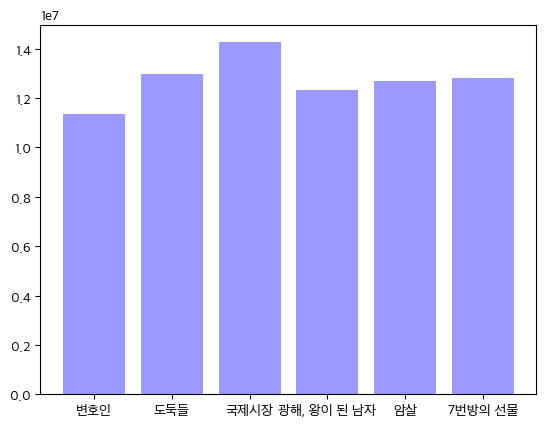

In [108]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.bar(tenmillion_df['title'], tenmillion_df['box_off_num'], color='blue', alpha=0.4)

In [27]:
#2) 장르별 관객수의 평균을 구해서 bar 차트를 만들어보자.
res = movie_df.groupby('genre')['box_off_num'].mean()
res02 = res.reset_index()
res02

,genre,box_off_num
0,SF,1.788346e+06
1,공포,5.908325e+05
2,느와르,2.263695e+06
3,다큐멘터리,6.717226e+04
4,드라마,6.256898e+05
5,멜로/로맨스,4.259680e+05
6,뮤지컬,6.627000e+03
7,미스터리,5.275482e+05
8,서스펜스,8.261100e+04
9,애니메이션,1.819267e+05


Text(0.5, 1.0, '장르별 관객수 평균')

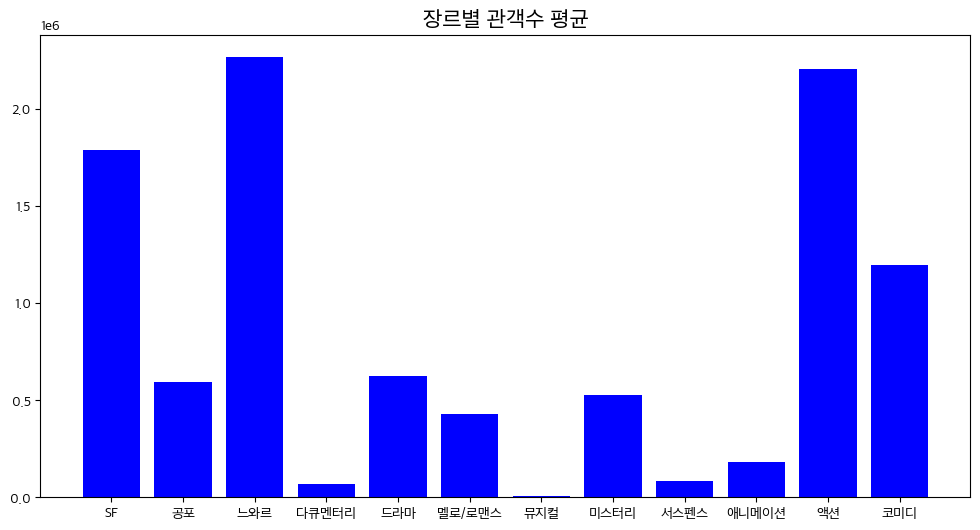

In [48]:
plt.figure(figsize = (12,6))
plt.rc('font', family='Apple SD Gothic Neo')
plt.bar(res02['genre'],res02['box_off_num'],color='blue')

plt.title('장르별 관객수 평균', fontsize=16)

In [30]:
#3) 년도별 최대 관객 수를 그래프로 그려보자.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [37]:
movie_df['r_date']= pd.to_datetime(movie_df['release_time'])
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,r_date,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04,2010


In [36]:
movie_df['year']=movie_df['r_date'].dt.year
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,r_date,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04,2010


In [38]:
year_max = movie_df.groupby('year')['box_off_num'].max()
year_max = year_max.reset_index()
year_max

,year,box_off_num
0,2010,6178665
1,2011,7482180
2,2012,12983841
3,2013,12811435
4,2014,14262766
5,2015,12706663


Text(0.5, 1.0, '년도별 최대 관객 수')

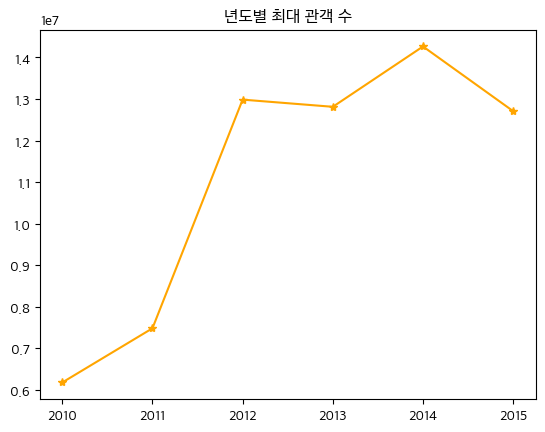

In [61]:
#3) 년도별 최대 관객 수를 그래프로 그려보자.

plt.plot(year_max['year'],year_max['box_off_num'], color = 'orange', marker = '*')
plt.title('년도별 최대 관객 수')

In [44]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

#Apple SD Gothic Neo

['STIXSizeFiveSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmss10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmex10',
 'cmr10',
 'cmmi10',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmsy10',
 'cmb10',
 'cmtt10',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXIntegralsUp',
 'Times New Roman',
 'Apple Symbols',
 'Arial Narrow',
 'Wingdings',
 'Noto Sans Javanese',
 'Courier',
 'Noto Sans Ugaritic',
 'Noto Sans Phoenician',
 'Noto Sans Mro',
 'STIXIntegralsUpD',
 'Noto Sans Gothic',
 'Palatino',
 'Times',
 'Hiragino Sans',
 'PT Mono',
 'Noto Sans NKo',
 'Comic Sans MS',
 'Wingdings 2',
 'Not

In [64]:
year_min = movie_df.groupby('year')['box_off_num'].min()
year_min = year_min.reset_index()
year_min

,year,box_off_num
0,2010,46
1,2011,36
2,2012,10
3,2013,205
4,2014,1
5,2015,8


Text(0.5, 1.0, '년도별 최소 관객 수')

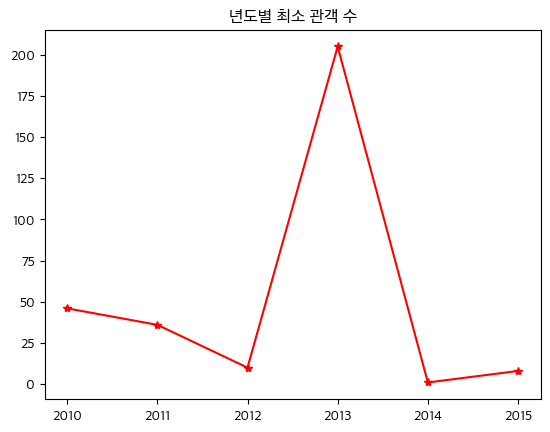

In [65]:
plt.plot(year_min['year'],year_min['box_off_num'], color = 'red', marker = '*')
plt.title('년도별 최소 관객 수')

Text(0.5, 1.0, '년도별 최소 관객 수')

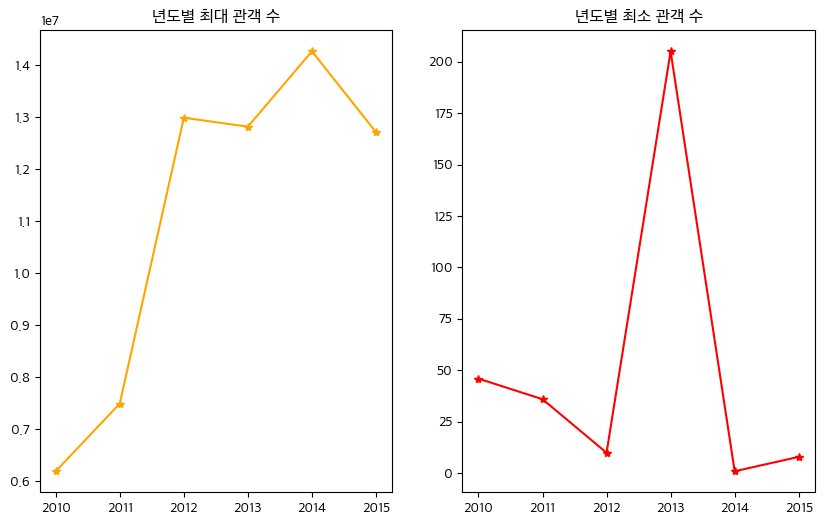

In [90]:
# 최대, 최소 관중 수의 그래프를 하나의 화면에 출력.

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(year_max['year'],year_max['box_off_num'], color = 'orange', marker = '*')
plt.title('년도별 최대 관객 수')

plt.subplot(1,2,2)
plt.plot(year_min['year'],year_min['box_off_num'], color = 'red', marker = '*')
plt.title('년도별 최소 관객 수')

In [69]:
#2) 영화 스태프 수의 분포도를 살펴보자.
staff=movie_df
staff.info()
staff.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    object        
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  r_date          600 non-null    datetime64[ns]
 13  year            600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(6)
memo

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02,600.000000
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05,2012.748333
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06,1.727224
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,2010.000000
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03,2011.000000
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04,2013.000000
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05,2014.000000
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07,2015.000000


In [101]:
staff['num_staff'].mean()

151.11833333333334

Text(0.5, 1.0, '스텝 인원 수 분포도')

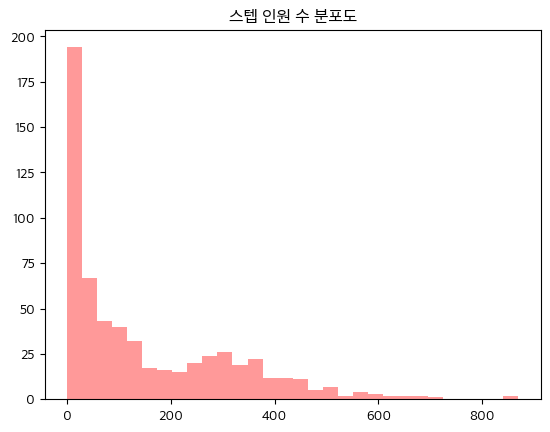

In [104]:
plt.hist(staff['num_staff'],bins=30, color='red', alpha=0.4)
plt.title('스텝 인원 수 분포도')

In [70]:
#5)영화 등급 비율을 그래프로 나타내보자.
screening_rat = movie_df['screening_rat'].value_counts()
screening_rat

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

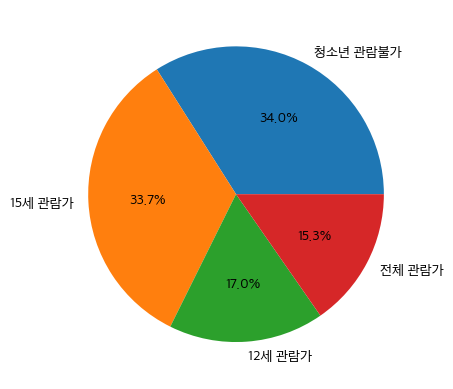

In [84]:
plt.pie(screening_rat, labels=screening_rat.keys(),autopct='%1.1f%%')
plt.show()